### K-Means 算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签

### 随机散点生成

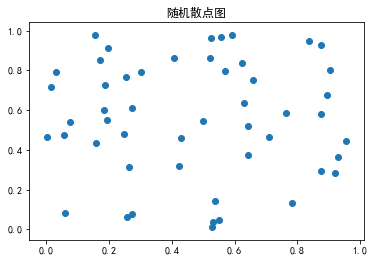

In [62]:
z = np.array(np.random.random(100)).reshape(-1,2)
plt.scatter(z[:,0],z[:,1])
plt.title('随机散点图')
plt.show()

### 初始化算法设置

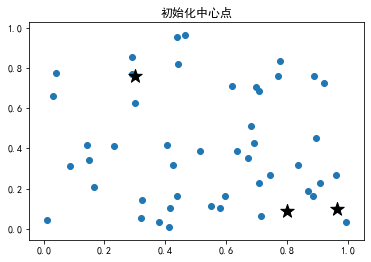

In [29]:
# 设置聚类k值
k = 3

# 图像分类颜色
color = ['r', 'g', 'm']
# 初始化中心点
init_center = z[np.random.choice(len(z), k), :]
# init_center_array = z[[6, 8, 11], :]
center_array = init_center_array
plt.scatter(z[:,0],z[:,1])
plt.scatter(init_center_array[:,0], init_center_array[:,1], marker='*', s=200, c='black')
plt.title('初始化中心点')
plt.show()

### 聚类过程（单次）

#### 计算距离聚类

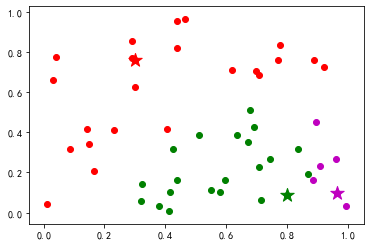

In [30]:
# 计算所有点到中心距离
distance_array = np.zeros(shape=(k, len(z)))
for idx, i in enumerate(center_array):
    distance_array[idx] = np.sqrt(np.sum((z-i)**2, axis=1))

# 聚类结果
cluster_labels = distance_array.argmin(axis=0)

# 可视化呈现
for idx, label in enumerate(set(cluster_labels)):
    same_cluster_idx = np.where(cluster_labels==label)[0]
    plt.scatter(z[same_cluster_idx, 0],z[same_cluster_idx,1], c=color[idx])
    plt.scatter(center_array[label,0], center_array[label,1], marker='*', s=200, c=color[idx])
plt.show()

#### 新成新中心点

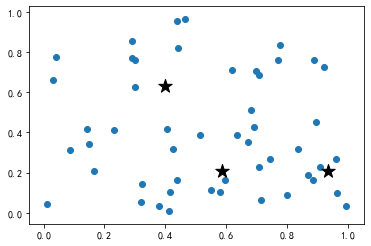

In [31]:
new_center_array = np.zeros(shape=(k,2))

for idx, label in enumerate(set(cluster_labels)):
    same_cluster_idx = np.where(cluster_labels==label)[0]
    new_center_array[idx] = z[same_cluster_idx].mean(axis=0)
    
plt.scatter(z[:,0],z[:,1])
plt.scatter(new_center_array[:,0], new_center_array[:,1], marker='*', s=200, c='black')
plt.show()

#### 计算新旧中心点距离偏移

In [32]:
center_distance_array = np.sqrt(((new_center_array - center_array)**2).sum(axis=1))
print('中心点距离为：', center_distance_array.tolist())
center_array = new_center_array.copy()

中心点距离为： [0.16359864755246095, 0.2471783954372722, 0.1140909065899949]


### 聚类过程（循环）

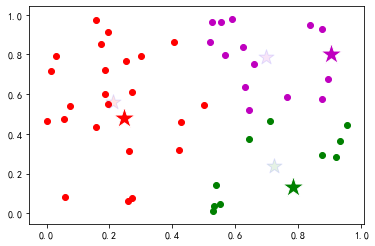

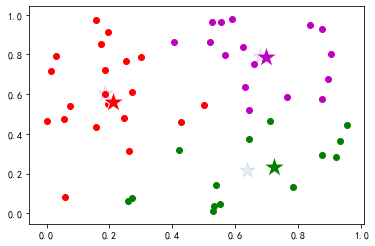

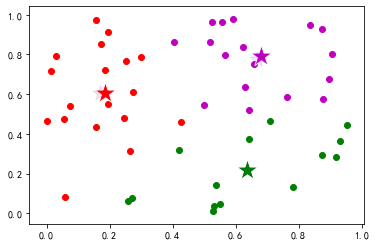

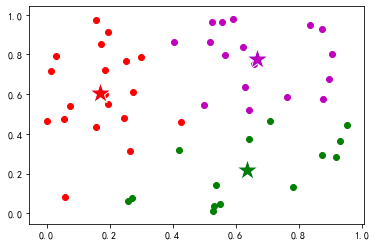

聚类结果： [0 0 0 0 2 1 0 0 1 2 0 2 1 1 0 1 0 1 1 1 2 2 0 0 2 2 2 1 1 2 2 1 0 2 2 0 2
 2 2 0 0 0 0 1 1 2 2 1 0 0]


In [121]:
# 初始化设置
N_CLUSTERS = 3
TOL = 0.0000
MAX_ITER = 100
cur_tol = TOL + 999
COLOURS = ['r', 'g', 'm', 'y', 'b', 'c', 'k']

# 初始化中心点
init_center_array = z[np.random.choice(len(z), N_CLUSTERS), :]

# 初始化距离数组
distance_array = np.zeros(shape=(N_CLUSTERS, len(z)))

# 初始化迭代次数
iter_count = 1

while True:
    # 计算所有点到中心点距离
    for idx, i in enumerate(init_center_array):
        distance_array[idx] = np.sqrt(np.sum((z-i)**2, axis=1))
    
    # 获取聚类结果
    cluster_labels = distance_array.argmin(axis=0)
    
    # 计算新中心点
    new_center_array = init_center_array.copy()
    for idx, label in enumerate(set(cluster_labels)):
        same_cluster_idx = np.where(cluster_labels==label)[0]
        new_center_array[idx] = z[same_cluster_idx].mean(axis=0)
        
    # 计算中心点的偏移距离
    center_distance_move_array = np.sqrt(((new_center_array - init_center_array)**2).sum(axis=1))
    cur_tol = center_distance_move_array.mean()
    
    # 可视化过程
    for idx, label in enumerate(set(cluster_labels)):
        same_cluster_idx = np.where(cluster_labels==label)[0]
        plt.scatter(z[same_cluster_idx, 0], z[same_cluster_idx,1], c=COLOURS[idx])
        plt.scatter(
            init_center_array[label,0], init_center_array[label,1], edgecolors='w', marker='*', c=COLOURS[idx], s=500)
        plt.scatter(new_center_array[idx, 0], new_center_array[idx, 1], edgecolors='b', c=COLOURS[idx], marker='*', s=250, alpha=0.1)
    plt.show()
    
    # 迭代跳出条件
    if cur_tol <= TOL or iter_count > MAX_ITER:
        break
    else:
        init_center_array = new_center_array
        iter_count += 1
print('聚类结果：', cluster_labels)